In [1]:
import os

"""
00 - Configuration
"""

dataset_zip_path = "../../data/yolo/yolo_outputs_4.zip"
output_folder = "../../data/processed/8.8_ajot/yolo/4_mbps"


In [2]:
"""
01 - Process yolo dataset

- Combine all .csv-files in the given .zip to a DataFrame
- Save the dataframe to output_path
"""


import zipfile
import time
import pandas as pd

names_container = {}
values_container = {}
timestamps_container = {}

# Open as zip
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:

    # Get a list of all files in the zip
    items = zip_ref.namelist()

    # Get a list of all .csv-files in the zip
    csv_files = [x for x in items if x.endswith('.csv')]
    csv_files.sort(reverse=True)  # NOTE: Sorting does not matter, but may be useful for debugging
    
    count = 0
    start_time = time.time()

    # Iterate over all csv-files
    dataframes = []
    for path in csv_files:
        count += 1
        print(f"Progress {count}/{len(csv_files):6}, ({count/len(csv_files)*100:5.3} %) (time_spent: {time.time() - start_time:.3} s  - avg: {(time.time() - start_time) / count} s)")
        with zip_ref.open(path) as csv_file:
            x = pd.read_csv(csv_file)
            dataframes.append(x)
    
    # Combine data to a single DataFrame
    df = pd.concat(dataframes)
    os.makedirs(output_folder, exist_ok=True)
    output_path = os.path.join(output_folder, "yolo_qos.feather")
    df.sort_index(inplace=True)
    df.reset_index(drop=False, inplace=True, names=["timestamp"])
    df.to_feather(output_path)
    print(f"Saved to {output_path}")



Progress 1/   698, (0.143 %) (time_spent: 8.58e-06 s  - avg: 1.239776611328125e-05 s)
Progress 2/   698, (0.287 %) (time_spent: 0.0272 s  - avg: 0.013602137565612793 s)
Progress 3/   698, ( 0.43 %) (time_spent: 0.0301 s  - avg: 0.010017712910970053 s)
Progress 4/   698, (0.573 %) (time_spent: 0.0318 s  - avg: 0.007939755916595459 s)
Progress 5/   698, (0.716 %) (time_spent: 0.0354 s  - avg: 0.007071256637573242 s)
Progress 6/   698, ( 0.86 %) (time_spent: 0.0367 s  - avg: 0.00611575444539388 s)
Progress 7/   698, (  1.0 %) (time_spent: 0.0399 s  - avg: 0.005693640027727399 s)
Progress 8/   698, ( 1.15 %) (time_spent: 0.0425 s  - avg: 0.0053153932094573975 s)
Progress 9/   698, ( 1.29 %) (time_spent: 0.0438 s  - avg: 0.004868825276692708 s)
Progress 10/   698, ( 1.43 %) (time_spent: 0.0456 s  - avg: 0.004562973976135254 s)
Progress 11/   698, ( 1.58 %) (time_spent: 0.0465 s  - avg: 0.004225037314675071 s)
Progress 12/   698, ( 1.72 %) (time_spent: 0.049 s  - avg: 0.00408633550008138 s)


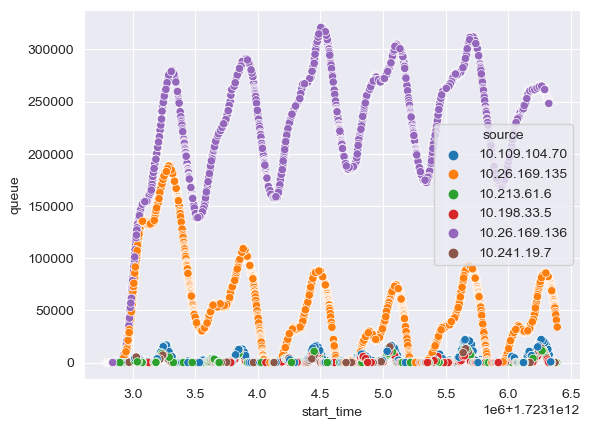

In [3]:
"""
Quick plot to partially visualize the data.
"""
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(y="queue", x="start_time", hue="source", data=df)
# sns.scatterplot(y="queue", x="Unnamed: 0", data=df)
plt.savefig("yolo_queue.png")
# df.plot.scatter(y=df.queue, x=df.index)

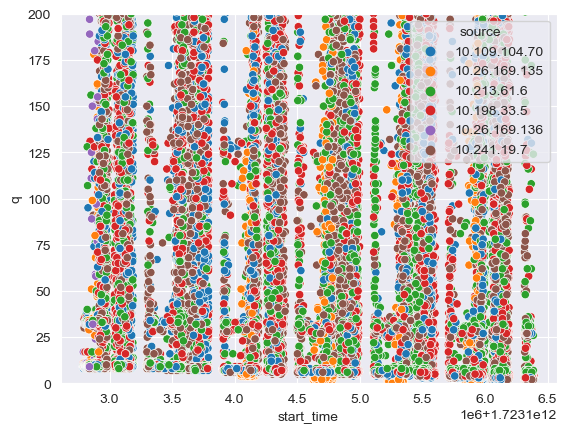

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
df2 = df.copy()
df2["q"] = df2["end_time"] - df2["start_time"]
sns.scatterplot(y="q", x="start_time", hue="source", data=df2)
plt.ylim(0,200)
# sns.scatterplot(y="queue", x="Unnamed: 0", data=df)
plt.savefig("yolo_queue.png")
# df.plot.scatter(y=df.queue, x=df.index)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df2 = df.copy()
df2["q"] = df2["end_time"] - df2["start_time"]
sns.ecdfplot(y="start_time", hue="source", data=df2)
plt.show()
sns.ecdfplot(y="end_time", hue="source", data=df2)
plt.show()
sns.ecdfplot(y="q", hue="source", data=df2)
